# Projeto 3: imagens em rotação

O objetivo deste projeto é fazer um programa que recebe uma imagem como entrada e gera um vídeo dessa mesma imagem girando à partir de seu centro.

## Algumas anotações teóricas

### Como fazer uma rotação

Uma matriz que realiza uma rotação de $\theta$ radianos ao redor do ponto $(0,0)$ é:

$$
R = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta)  \\
\end{bmatrix}
$$

Se usarmos a ideia de aumentar uma dimensão, a matriz fica:
$$
R = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

Lembre-se que para rotacionar ao redor de um ponto arbitrário $(x_0, y_0)$ é preciso deslocar esse ponto para a origem (ou seja, realizar uma translação), realizar a rotação e, por último, desfazer a translação.

### Transformações compostas (*composite transformations*)

Estamos representando nossos pixels como as colunas de uma matriz $X$, como fizemos durante a aula. Quando aplicamos uma transformação $A$, encontramos uma matriz $Y=AX$. Podemos aplicar então uma transformação $B$ sobre $Y$, encontrando $Z=BY$. Então:

$$
Z = BY = B A X
$$

Porém, veja, nesta implementação, aplicamos a transformação $A$ sobre *todos* os pixels, e depois aplicamos a transformação $B$ sobre *todos* os pixels. Podemos, porém, calcular uma matriz $C = BA$ e então simplificar essa operação:

$$
Z = BA X = C X
$$

E, agora, usando a matriz $C$, só precisamos iterar por todos os pixels de $X$ uma única vez. Isso pode aumentar significativamente a velocidade em que as transformações são aplicadas.

### Retirando artefatos da imagem

Talvez, ao realizar uma rotação, você veja a sua imagem resultante cheia de pontinhos. Isso acontece porque nem todo ponto na imagem de destino tem um correspondente na imagem de origem. Então, podemos solucionar isso usando a seguinte ideia:

Em nossa implementação da aula, os pixels de destino $X_d$ foram encontrados transformando os pixels de origem $X_o$ por uma matriz $A$, isto é:

$$
X_d = A X_o
$$

Os pixels de $X_o$ estão bem organizados em uma grade, mas os pixels de $X_d$ não, e é isso que leva ao surgimento desses pontinhos pretos no meio da imagem. Porém, nada impede que façamos os pixels de $X_d$ como uma grade, e então encontremos os pixels em $X_o$ correspondentes usando a transformação inversa:

$$
X_o = A^{-1} X_d
$$


## Como abrir uma imagem

Para abrir uma imagem, podemos usar a biblioteca PIL. Ao abrir uma imagem, vamos conseguir um `np.array` com dimensões correspondentes a largura, altura, e número de cores da imagem:

(300, 600, 3)


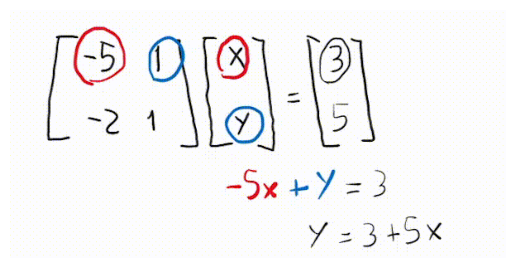

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image as a NumPy array (BGR format)
img_array = cv2.imread('matriz_para_reta.png')
# Convert BGR to RGB
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

print(img_array.shape)  # (height, width, channels)

# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()


## Como fazer um video à partir de várias imagens

A ideia é colocar todas as imagens em um `np.array` com dimensões altura, largura, número de cores e número de frames, e depois usar o próprio OpenCV para gerar os vídeos:

In [5]:
import cv2
import os
import numpy as np 

# Set the path to your image folder
image_folder = 'images'
video_name = 'output_video.mp4'

height = 300
width = 300
layers = 3
n_frames = 90

images = np.random.random( size=(height, width, layers, n_frames))

# Define the video writer
video = cv2.VideoWriter(
    video_name,
    cv2.VideoWriter_fourcc(*'mp4v'),  # Codec
    30,                               # Frames per second
    (width, height)                   # Frame size
)
    
# Write each image to the video
for i in range(n_frames):
    video.write((images[:, :, :, i] * 255).astype(np.uint8))

video.release()
cv2.destroyAllWindows()

## Como usar os testes automáticos

* Faça o seu projeto no arquivo projeto3.py, implementando as funções que foram fornecidas
* Use o comando `pytest test.py` para executar os testes de unidade
* Os testes não avaliam se o vídeo foi salvo corretamente! A parte de salvar o vídeo e assisti-lo deve ser testada manualmente!
